In [1]:
import pyexcel as p
import openpyxl as xl

p.save_book_as(file_name='Dataset/employment/literacy_female.xls',
               dest_file_name='Dataset/employment/literacy_female.xlsx')

p.save_book_as(file_name='Dataset/employment/Employment_services_female.xls',
               dest_file_name='Dataset/employment/Employment_services_female.xlsx')

in_file ="Dataset/employment/literacy_female.xlsx"
oldwb = xl.load_workbook(in_file)
oldws = oldwb.worksheets[0]

in_file1 ="Dataset/employment/Employment_services_female.xlsx"
oldwb1 = xl.load_workbook(in_file1)
oldws1 = oldwb1.worksheets[0]

out_file = "Dataset/employment/literacy_services_female.xlsx"
newwb = xl.load_workbook(out_file)
newws = newwb.active 

i=2
#read from first file
for process_line in range(2,266):
	#3,267
	country_name=oldws.cell(row = process_line, column = 1).value
	for cols in range(3,63):
		#print(oldws.cell(row =2, column = cols).value)
		data_point=oldws.cell(row = process_line, column = cols).value
		if data_point!=None:
			for line in range(2,189):
				if oldws1.cell(row = line, column = 1).value==country_name:
					data_point_2=oldws1.cell(row = line, column = cols).value
					if data_point_2!=None:
					#save data point from both file
						newws.cell(row =i, column = 1).value = country_name
						newws.cell(row =i, column = 2).value = oldws.cell(row = 1, column = cols).value
						newws.cell(row =i, column = 3).value = data_point
						newws.cell(row =i, column = 4).value = data_point_2
						i=i+1
		
newwb.save(str(out_file))

#employment_agriculture is done

In [2]:
#calculating correlation coefficient 

import numpy as np
import pandas as pd

df = pd.read_excel('Dataset/employment/literacy_services_female.xlsx', index_col=0) 

In [3]:
correlated_features = set()
correlation_matrix = df.corr()

In [4]:
print(correlation_matrix)

                        Year  Literacy  Employ_Agriculture
Year                1.000000  0.202493            0.205167
Literacy            0.202493  1.000000            0.674085
Employ_Agriculture  0.205167  0.674085            1.000000


In [5]:
column_1 = df["Literacy"]
column_2 = df["Employ_Agriculture"]
correlation = column_1.corr(column_2)
print(correlation)

0.674084703490613


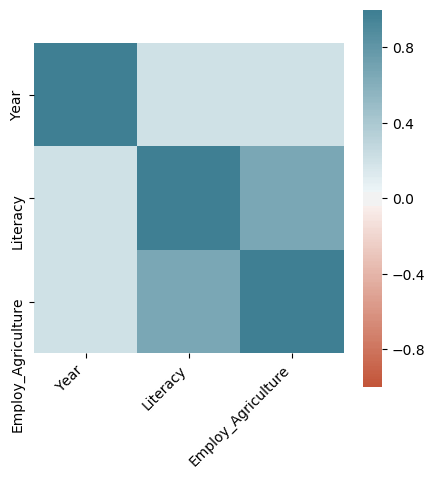

In [48]:
#heatmap of correlation matrix
import seaborn as sns

ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig("Literacy vs employment")

In [7]:
import pyexcel as p
import openpyxl as xl

p.save_book_as(file_name='Dataset/employment/GenderEmploymentIndex.xlsx',
               dest_file_name='Dataset/employment/GenderEmploymentIndex.xlsx')


in_file ="Dataset/employment/GenderEmploymentIndex.xlsx"
oldwb = xl.load_workbook(in_file)
oldws = oldwb.worksheets[0]

in_file1 ="Dataset/employment/GPI_3_factors.xlsx"
oldwb1 = xl.load_workbook(in_file1)
oldws1 = oldwb1.worksheets[0]

out_file = "Dataset/employment/GPI_Gender_Employment_upper_middle.xlsx"
newwb = xl.load_workbook(out_file)
newws = newwb.active 

i=2
#read from first file
for process_line in range(2,189):
	#3,267
	country_name=oldws.cell(row = process_line, column = 1).value
	income_group=oldws.cell(row = process_line, column = 2).value
	if income_group=="Upper middle income":
		for cols in range(4,34):
			#print(oldws.cell(row =2, column = cols).value)
			year=oldws.cell(row = 1, column = cols).value
			data_point=oldws.cell(row = process_line, column = cols).value
			data_point_2=oldws1.cell(row = process_line, column = cols).value
			newws.cell(row =i, column = 1).value = country_name
			newws.cell(row =i, column = 2).value = income_group
			newws.cell(row =i, column = 3).value = year
			newws.cell(row =i, column = 4).value = data_point_2
			newws.cell(row =i, column = 5).value = data_point
			i=i+1



newwb.save(str(out_file))

In [8]:
#calculating correlation coefficient 

import numpy as np
import pandas as pd

df1 = pd.read_excel('Dataset/employment/GPI_Gender_Employment_upper_middle.xlsx', index_col=0) 

In [9]:
correlated_features = set()
correlation_matrix1 = df1.corr()

In [10]:
print(correlation_matrix1)

                       Year       GPI  Gender_Employment
Year               1.000000  0.033229          -0.031184
GPI                0.033229  1.000000           0.850256
Gender_Employment -0.031184  0.850256           1.000000


In [11]:
column_1 = df1["GPI"]
column_2 = df1["Gender_Employment"]
correlation1 = column_1.corr(column_2)
print(correlation1)

0.8502556432207031


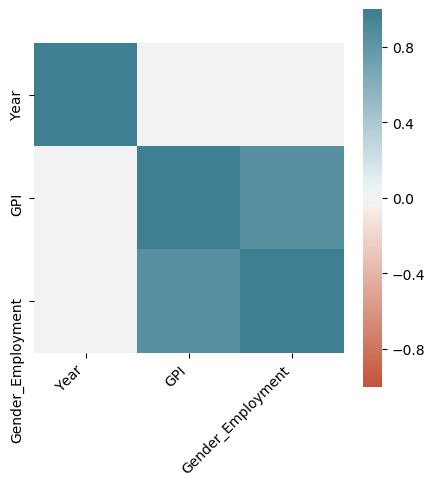

In [49]:
#heatmap of correlation matrix
import seaborn as sns

ax = sns.heatmap(
    correlation_matrix1, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig("GPI vs Gender employment")

In [13]:
print(df1.index.unique())
label_array = df1.index.unique()
print(df1)

Index(['Albania', 'Argentina', 'Armenia', 'Azerbaijan', 'Bulgaria',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Brazil', 'Botswana',
       'China', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic',
       'Ecuador', 'Fiji', 'Gabon', 'Georgia', 'Equatorial Guinea', 'Guatemala',
       'Guyana', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Jamaica',
       'Jordan', 'Kazakhstan', 'Lebanon', 'Libya', 'St. Lucia', 'Maldives',
       'Mexico', 'North Macedonia', 'Montenegro', 'Malaysia', 'Namibia',
       'Peru', 'Paraguay', 'Russian Federation', 'Serbia', 'Suriname',
       'Thailand', 'Turkmenistan', 'Tonga', 'Turkey',
       'St. Vincent and the Grenadines', 'Venezuela, RB', 'Samoa',
       'South Africa'],
      dtype='object', name='Country_name')
                     Income_group  Year       GPI  Gender_Employment
Country_name                                                        
Albania       Upper middle income  1991  0.664991           0.863223
Albania       Uppe

In [16]:

UniqueNames = df1.index.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame for elem in UniqueNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = df1[:][df1.index == key]

In [20]:
len(DataFrameDict)

50

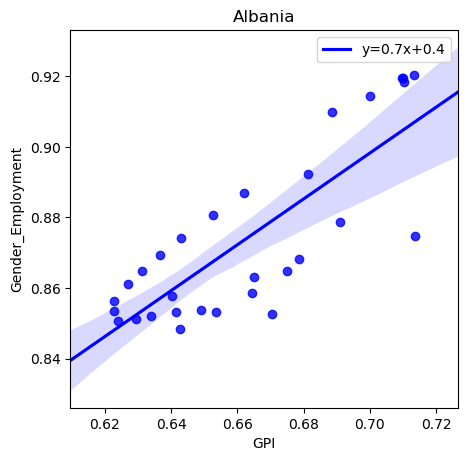

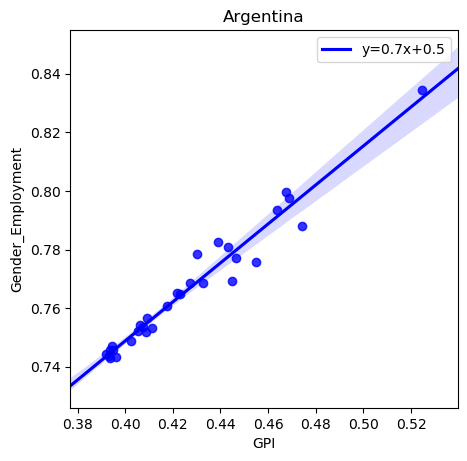

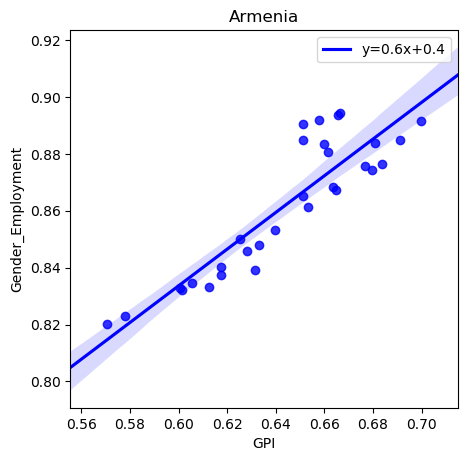

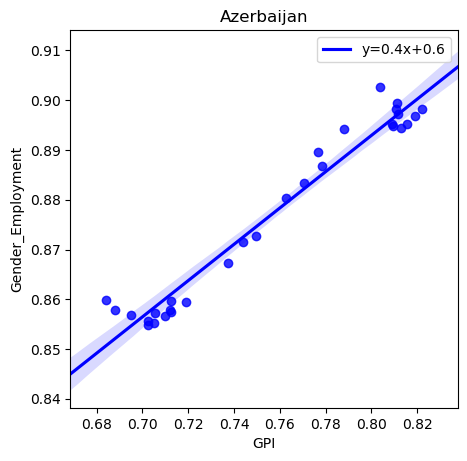

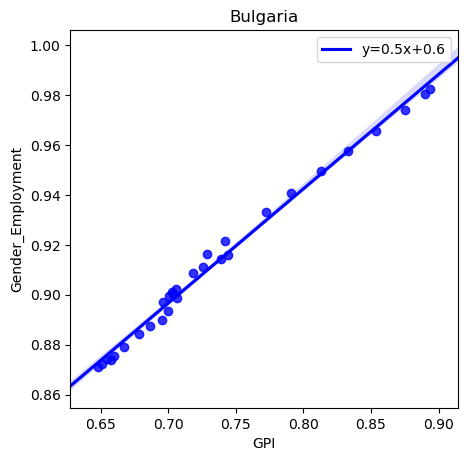

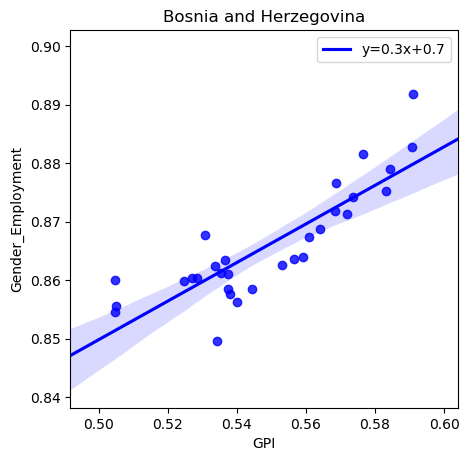

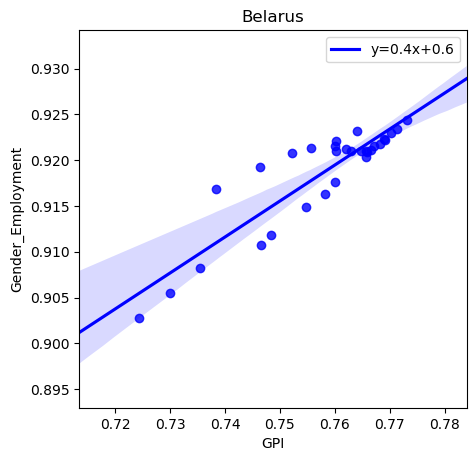

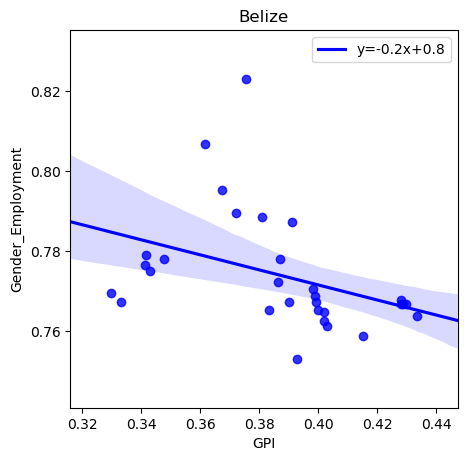

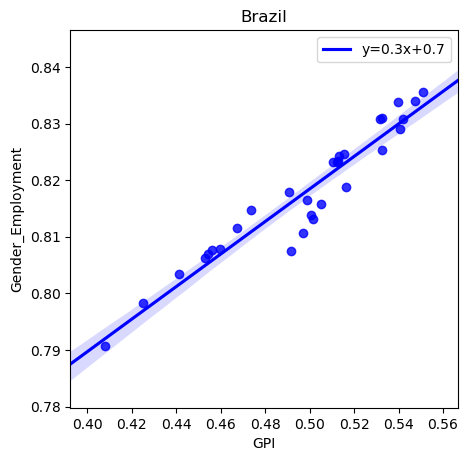

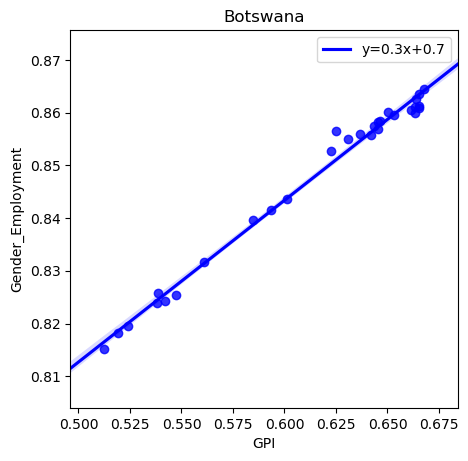

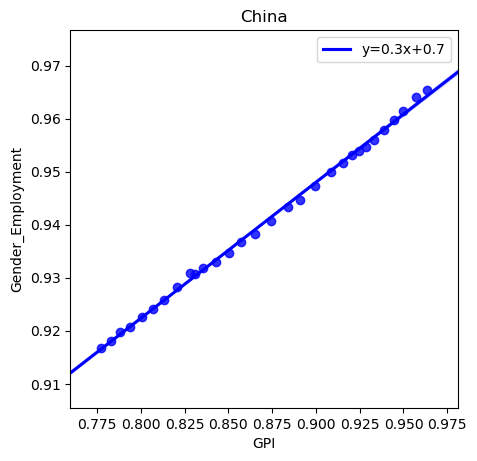

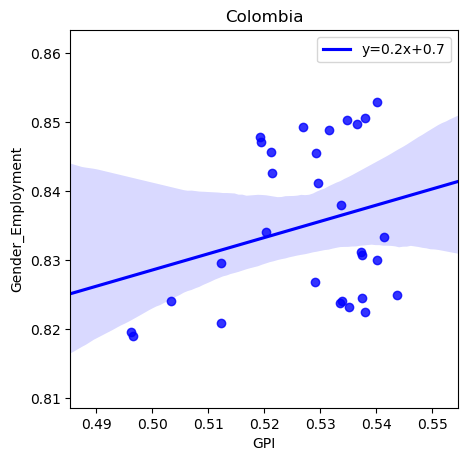

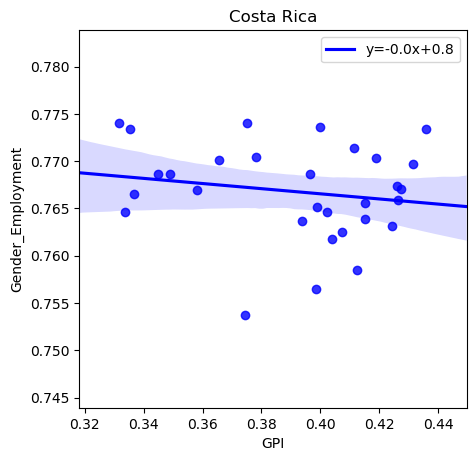

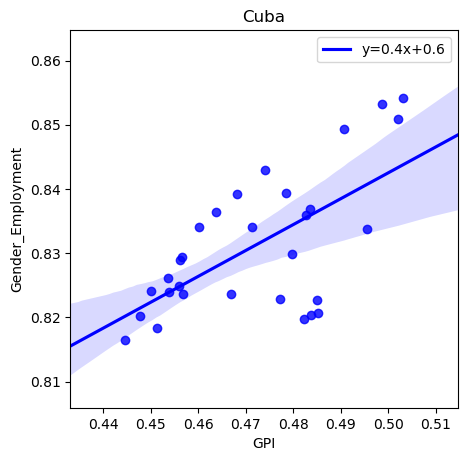

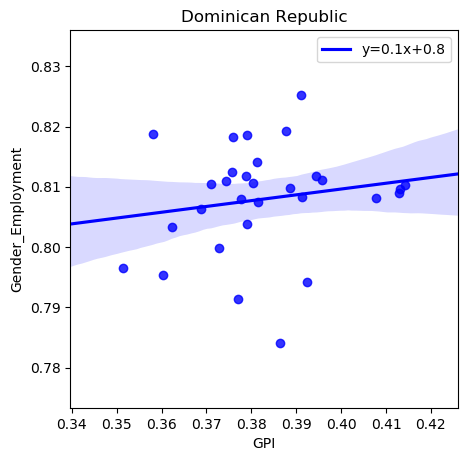

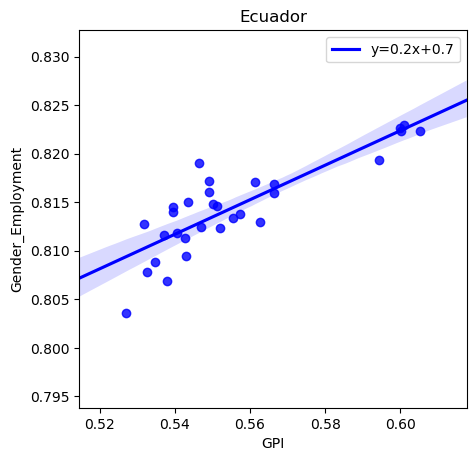

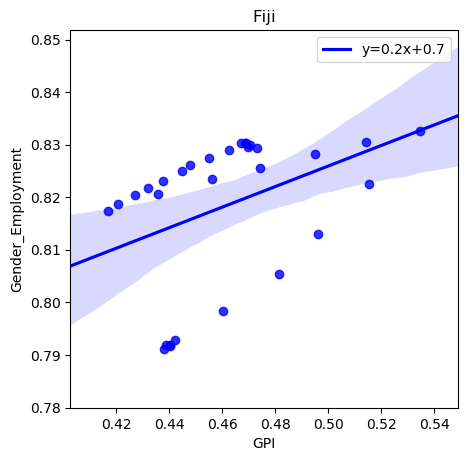

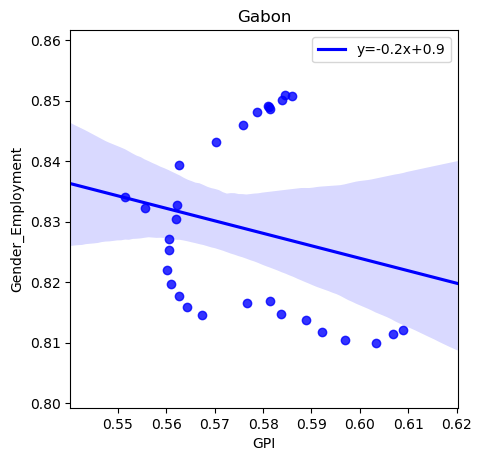

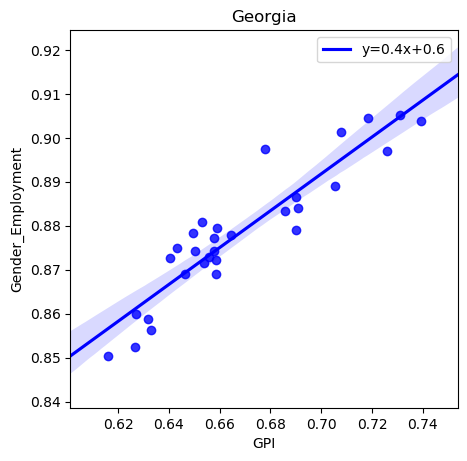

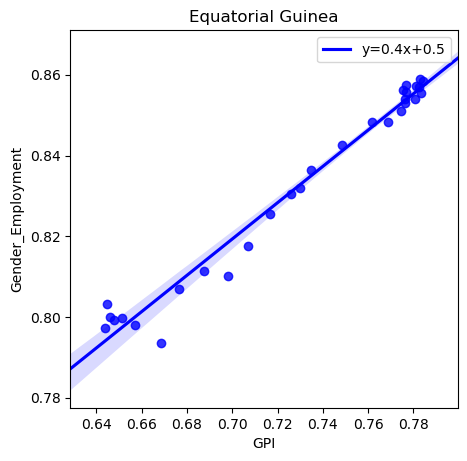

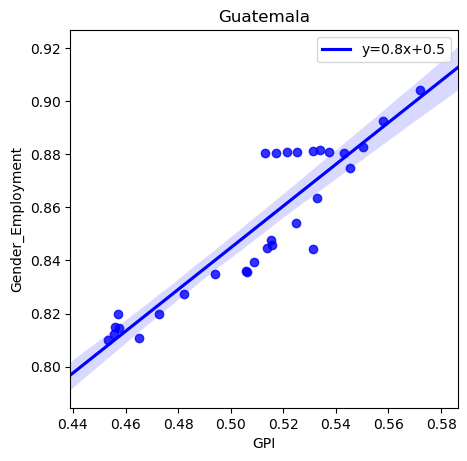

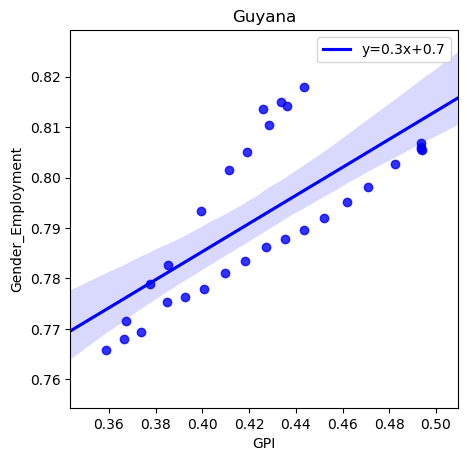

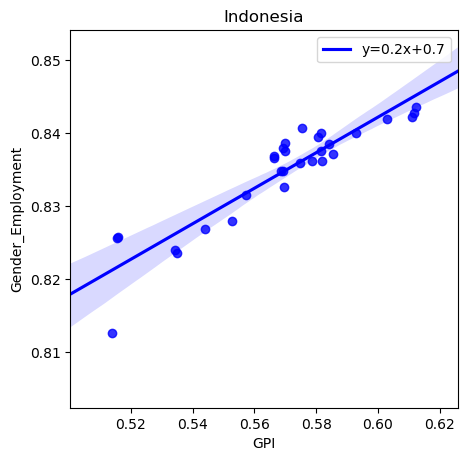

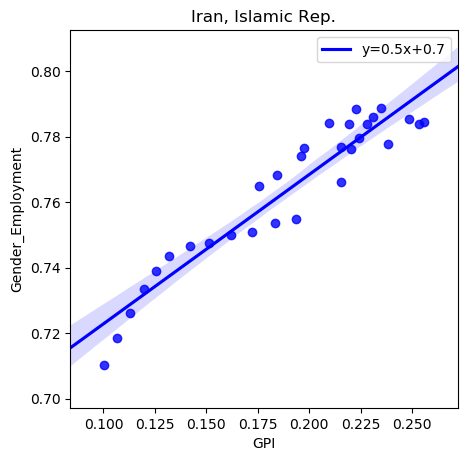

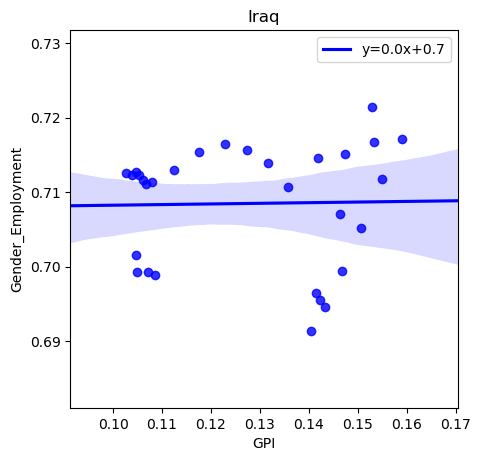

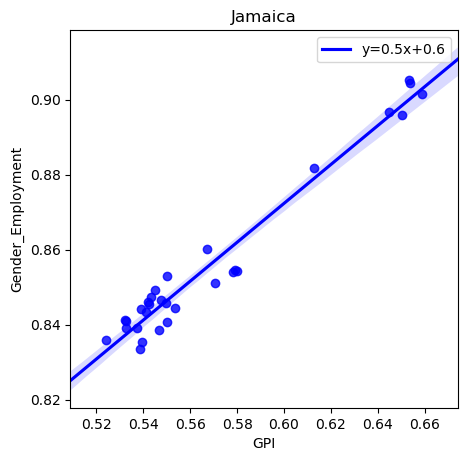

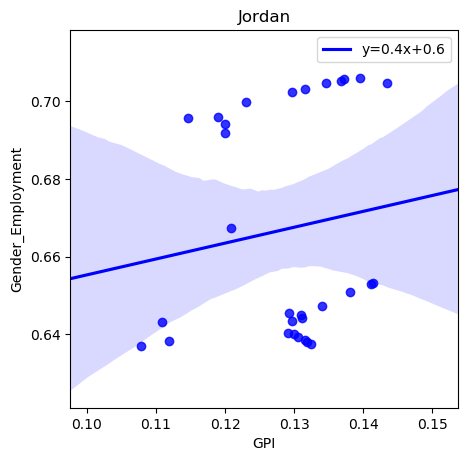

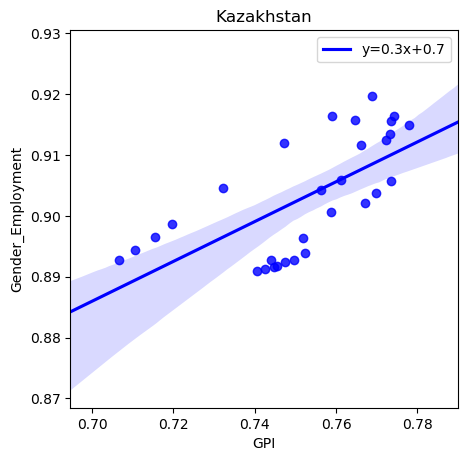

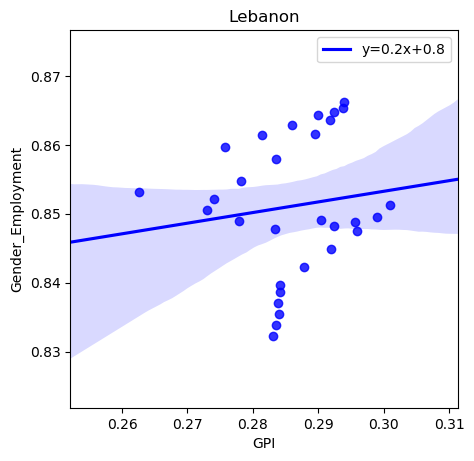

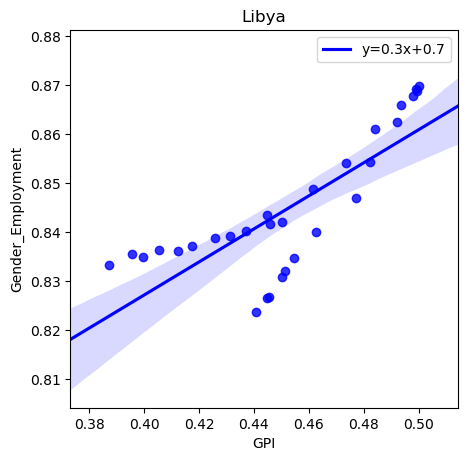

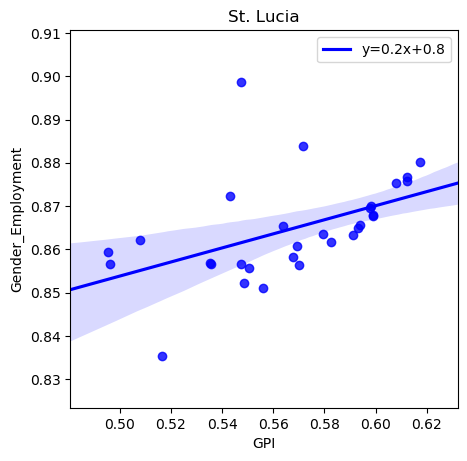

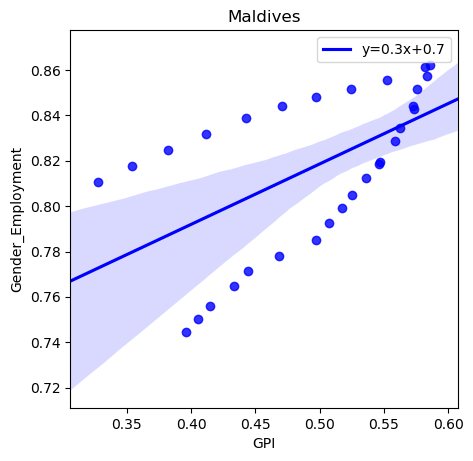

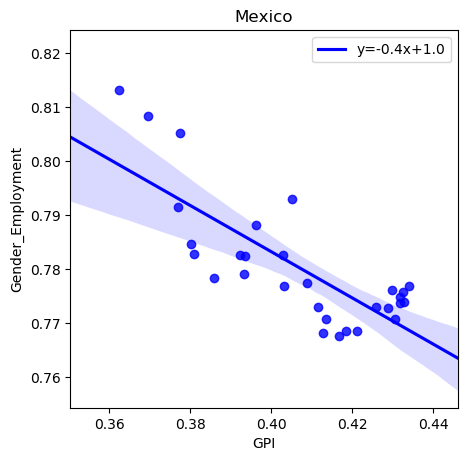

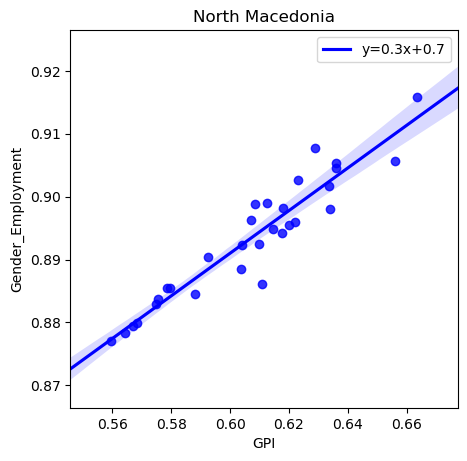

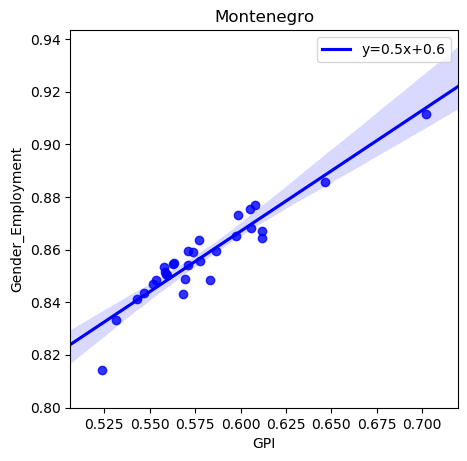

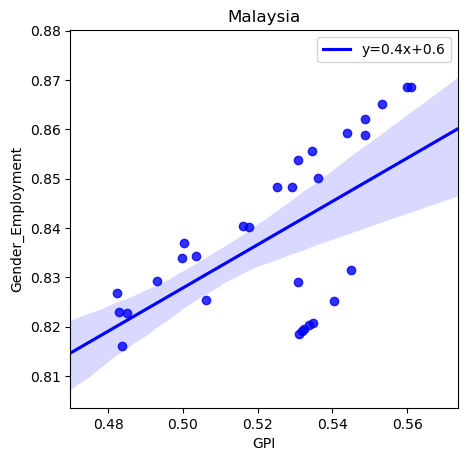

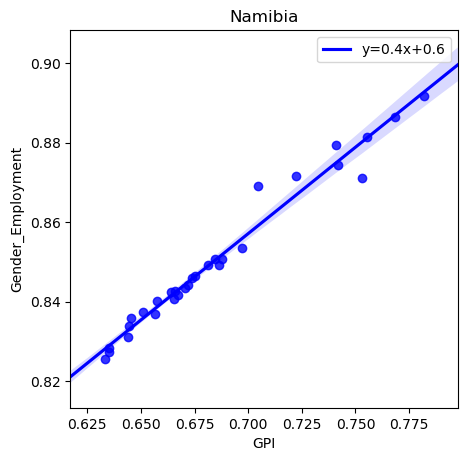

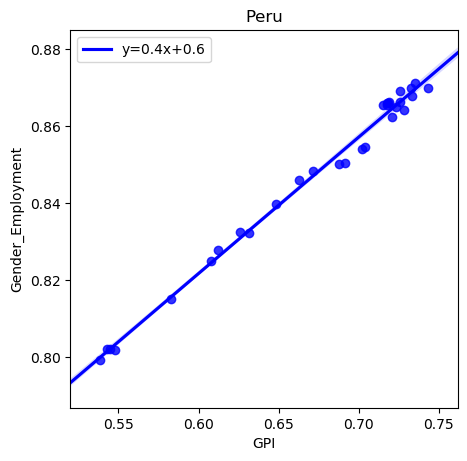

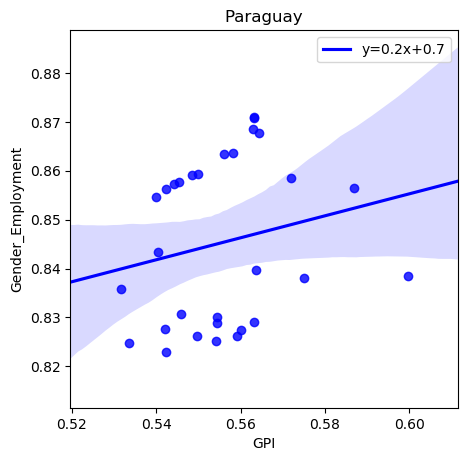

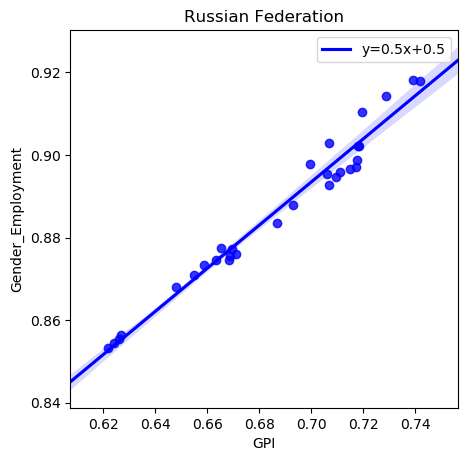

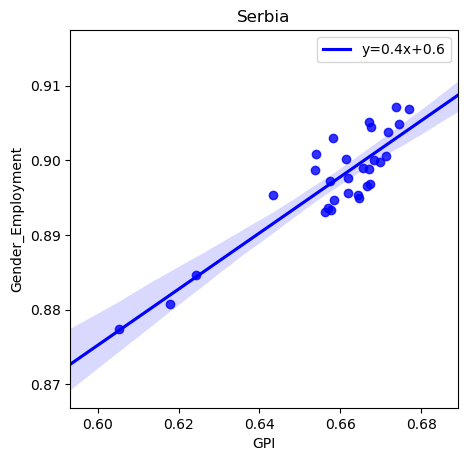

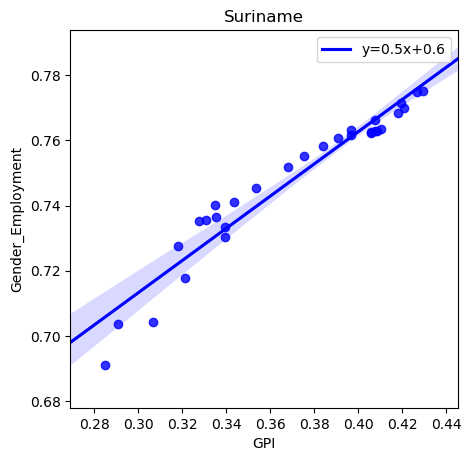

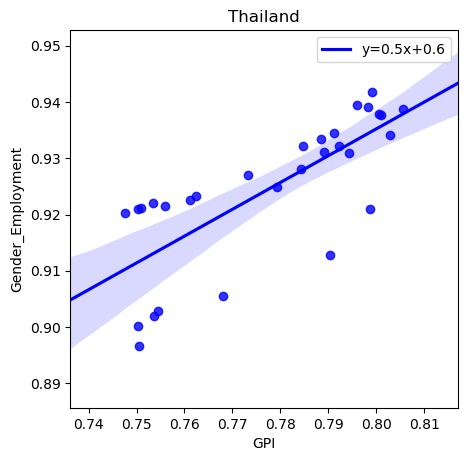

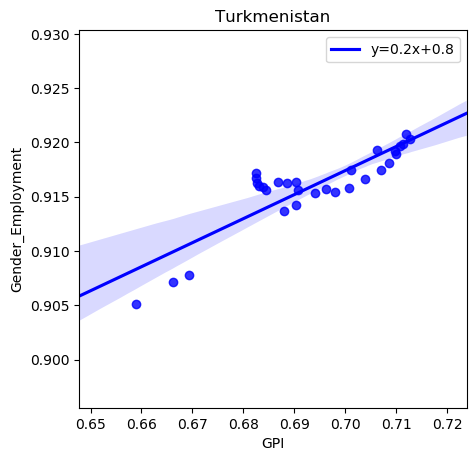

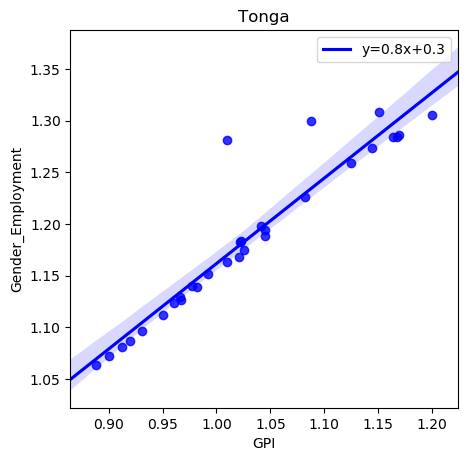

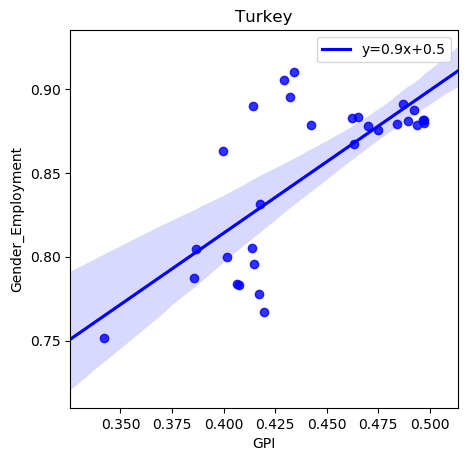

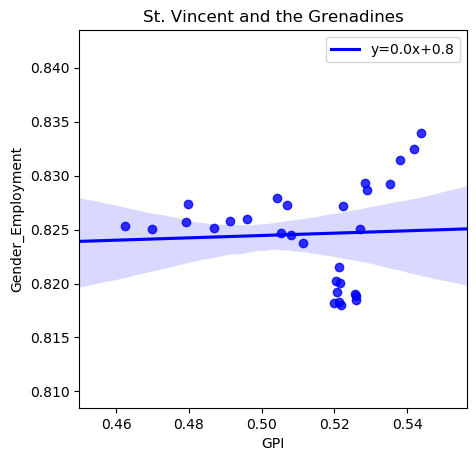

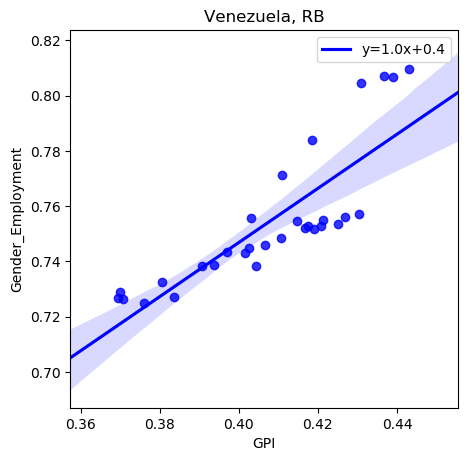

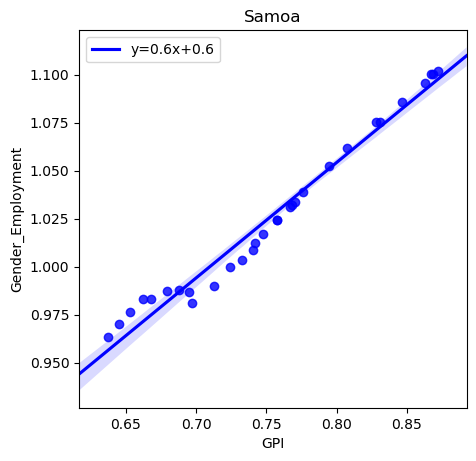

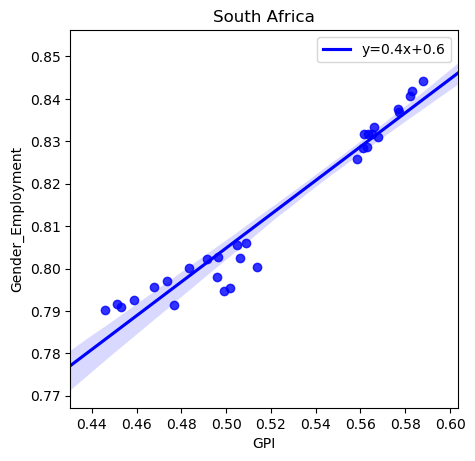

In [47]:
import seaborn as sns
from scipy import stats
keys_list = list(DataFrameDict)
for i in range(len(keys_list)):
    df1=DataFrameDict[keys_list[i]]
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    slope, intercept, r_value, p_value, std_err = stats.linregress(df1['GPI'],df1['Gender_Employment'])
    ax = sns.regplot(x='GPI', y='Gender_Employment', data=df1,color='b',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.title(keys_list[i]);
    ax.legend()
    plt.savefig(str(keys_list[i])+"figure.png")
    plt.show()


